In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
df=pd.read_csv(r"C:\Users\Roshni\OneDrive\Desktop\SS and Pics\Diabetes Prediction.csv")

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [34]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [35]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [38]:
corr=df.corr()

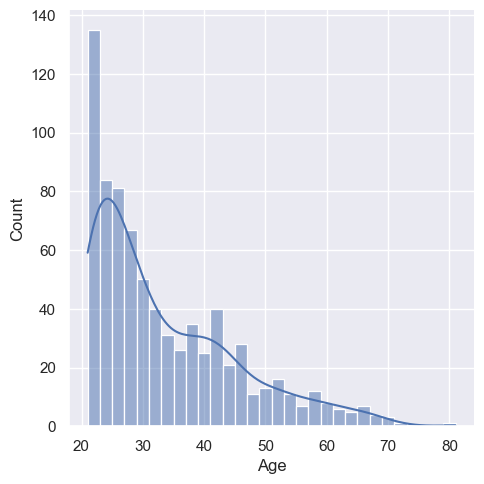

In [39]:
sns.displot(df['Age'],bins=30,kde=True)

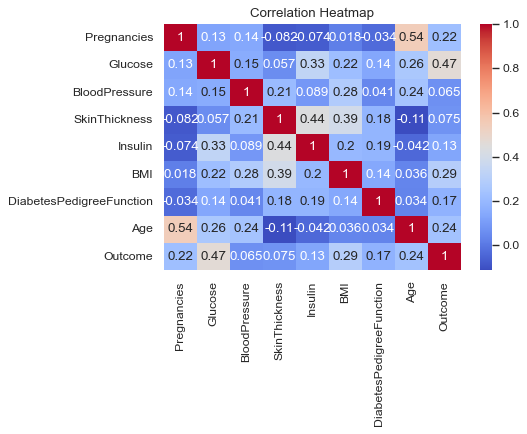

In [72]:
plt.figure (figsize = [6,4],  dpi = 80 )
plt.title ("Correlation Heatmap" , fontsize = 12 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )
plt.show()

<Axes: xlabel='Pregnancies', ylabel='Age'>

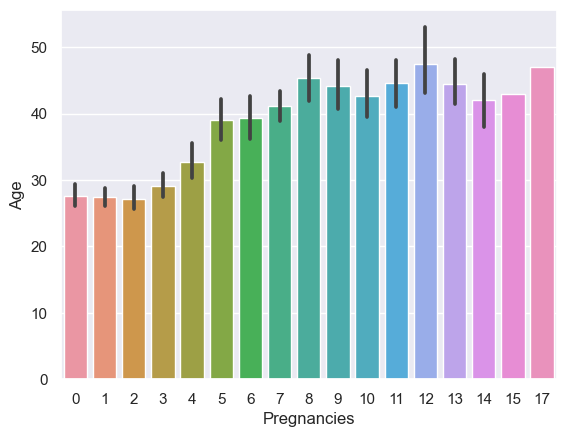

In [57]:
sns.barplot(x='Pregnancies',y='Age',data=df)

<Axes: title={'center': 'Correlation Heatmap'}>

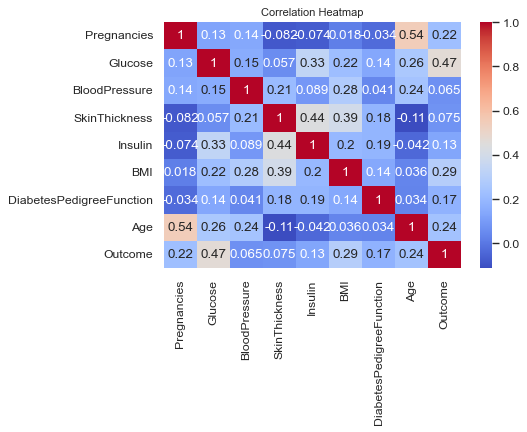

In [73]:
plt.figure (figsize = [6,4],  dpi = 80 )
plt.title ("Correlation Heatmap" , fontsize = 10 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )

<Axes: >

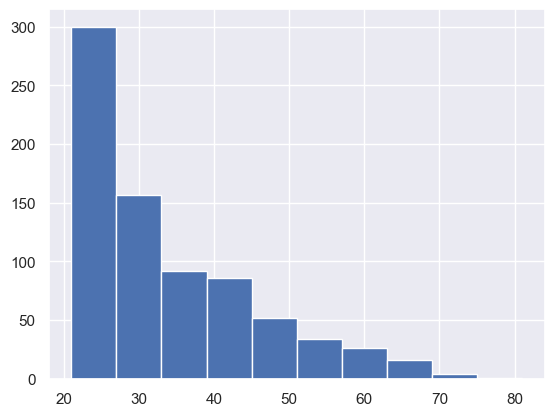

In [59]:
sns.set()
df['Age'].hist()

<Axes: xlabel='Age', ylabel='Glucose'>

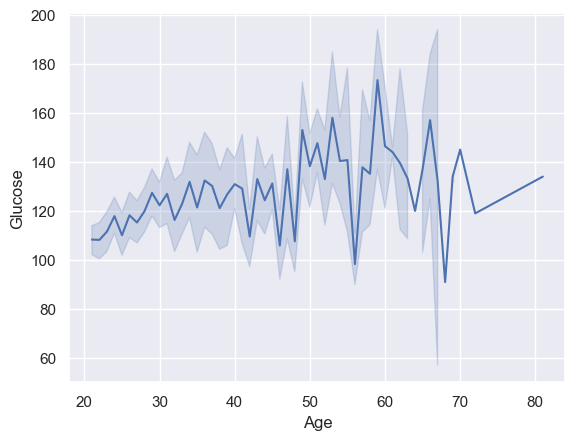

In [60]:
sns.lineplot(x='Age',y='Glucose',data=df)

<Axes: xlabel='Age', ylabel='Glucose'>

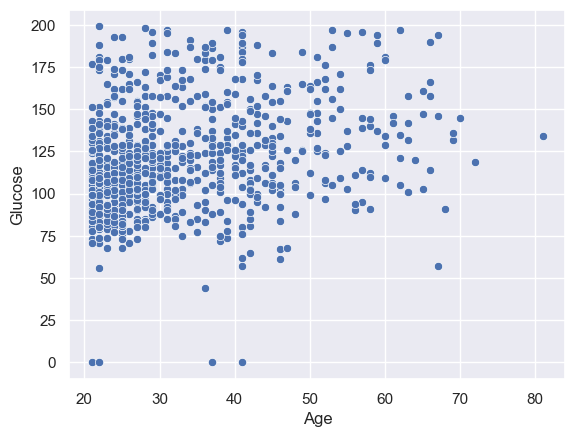

In [61]:
sns.scatterplot(x='Age',y='Glucose',data=df)

In [62]:
cols = df.columns
colors = ['Blue',"Green","Red","Black"]  

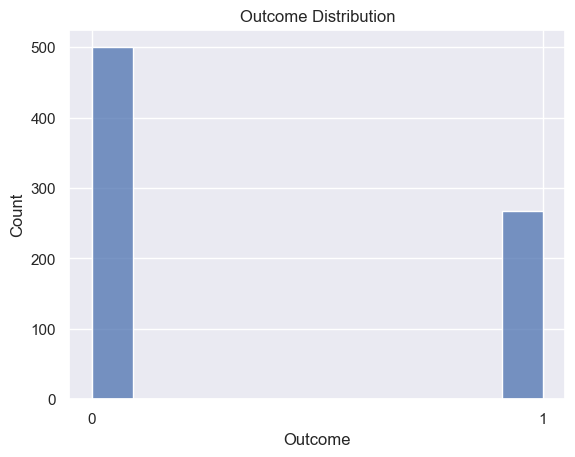

In [75]:
plt.title(f"{cols[8]} Distribution")
sns.histplot(data=df, x=df[cols[8]])
plt.xticks(ticks=[i for i in df[cols[8]].unique()])
plt.show()

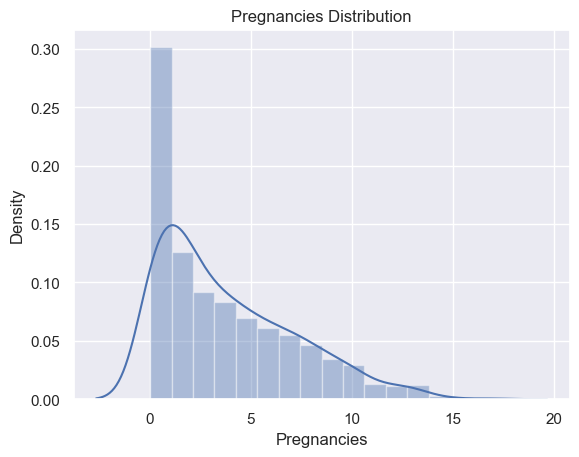

In [64]:
for i in range (0,1):
 plt.title(f"{cols[i]} Distribution")
 sns.distplot(df[cols[i]])
 plt.show()
 print('\n')

In [65]:
x = df.drop('Outcome',axis=1)
y= df['Outcome']
print("Shape of X:\t",x.shape)
print("Shape of Y:\t",y.shape)

Shape of X:	 (768, 8)
Shape of Y:	 (768,)


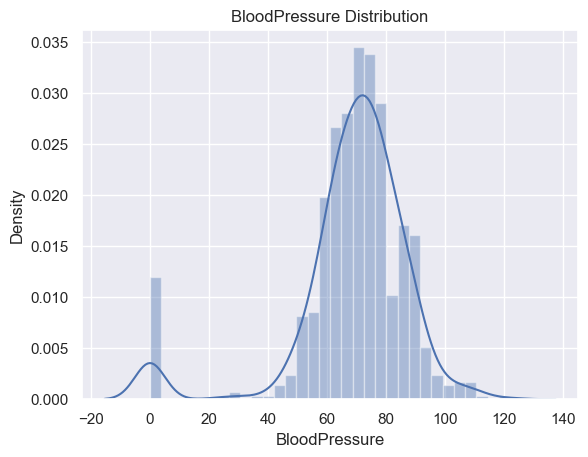

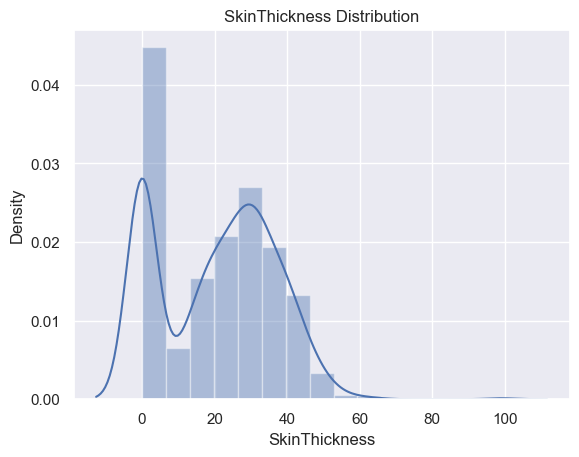

In [66]:
for i in range (2,4):
 plt.title(f"{cols[i]} Distribution")
 sns.distplot(df[cols[i]])
 plt.show()
 print('\n')


Diabetic Patient Count:			268
Non-Diabetic Patient Count:		500
Diabetic Patient Percentage:		34.9 %
Non-Diabetic Patient Percentage:	65.1 %


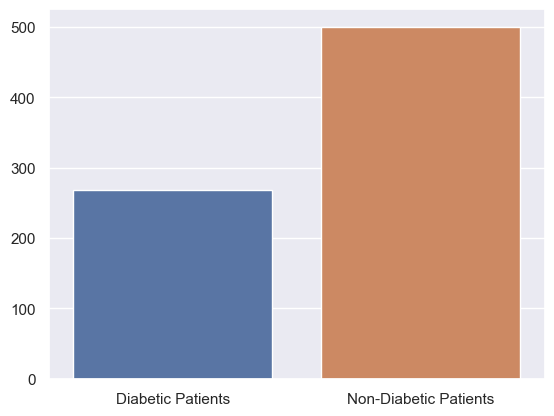

In [67]:
diabetic = df[df["Outcome"]==1]
non_diabetic = df[~(df["Outcome"]==1)]

print("Diabetic Patient Count:\t\t\t"+ str(len(diabetic)))
print("Non-Diabetic Patient Count:\t\t"+ str(len(non_diabetic)))
sns.barplot(x=['Diabetic Patients','Non-Diabetic Patients'], y= [len(diabetic),len(non_diabetic)], )
print("Diabetic Patient Percentage:\t\t" + str(round(len(diabetic)/len(df)*100,2)) + " %")
print("Non-Diabetic Patient Percentage:\t" + str(round(len(non_diabetic)/len(df)*100,2)) + " %")

In [68]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [69]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [70]:
y = df['Outcome']
x = df.drop('Outcome', axis=1)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = df['Outcome'])

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)

In [78]:
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
cm

array([[82, 18],
       [26, 28]], dtype=int64)

<Axes: >

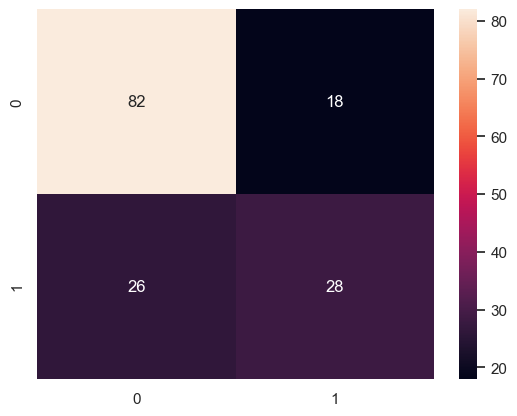

In [80]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [82]:
print("enter input:")
p=int(input("enter Pregnancies:"))
g=int(input("enter Glucose :"))
b=int(input("enter Blood Pressure:"))
t=int(input("enter Skin Thickness"))
i=int(input("enter Insulin:"))
m=float(input("enter BMI"))
f=float(input("enter DiabetesPedigreeFunction"))
a=int(input("enter age(in years):"))
y_predict = model.predict([[p,g,b,t,i,m,f,a]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

enter input:
[1]
Diabetic


In [83]:
pipeline_lr  = Pipeline([('scalar1',StandardScaler()),
                         ('lr_classifier',LogisticRegression())])

pipeline_knn = Pipeline([('scalar2',StandardScaler()),
                          ('knn_classifier',KNeighborsClassifier())])

pipeline_svc = Pipeline([('scalar3',StandardScaler()),
                         ('svc_classifier',SVC())])

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier(max_depth=3))])
pipeline_gbc = Pipeline([('gbc_classifier',GradientBoostingClassifier())])


In [85]:
pipelines = [pipeline_lr,
            pipeline_knn,
            pipeline_svc,
            pipeline_dt,
            pipeline_rf,
            pipeline_gbc]

In [86]:
pipe_dict = {0:'Logistic Regression',
             1:'KNeighbors Classifier',
             2:'SVC',
             3:'Decision Tree Classifier',
             4: 'Random Forest Classifier',
             5: 'Gradient Boosting Classifier'}

In [88]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Outcome',axis=1)
Y = df['Outcome']
rf =RandomForestClassifier(max_depth=3)

In [89]:
rf.fit(X,Y);

In [90]:
new_data = pd.DataFrame({
    'Pregnancies':6,
    'Glucose':85.0,
    'BloodPressure':66.0,
    'SkinThickness':29.0,
    'Insulin':2.345,
    'BMI':36.6,
    'DiabetesPedigreeFunction':0.351,
    'Age':31,
},index=[0])

In [91]:
p = rf.predict(new_data)

In [92]:
if p[0] == 0:
    print('Non-Diabetic Patient')
else:
    print('Diabetic Patient')

Non-Diabetic Patient
